posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


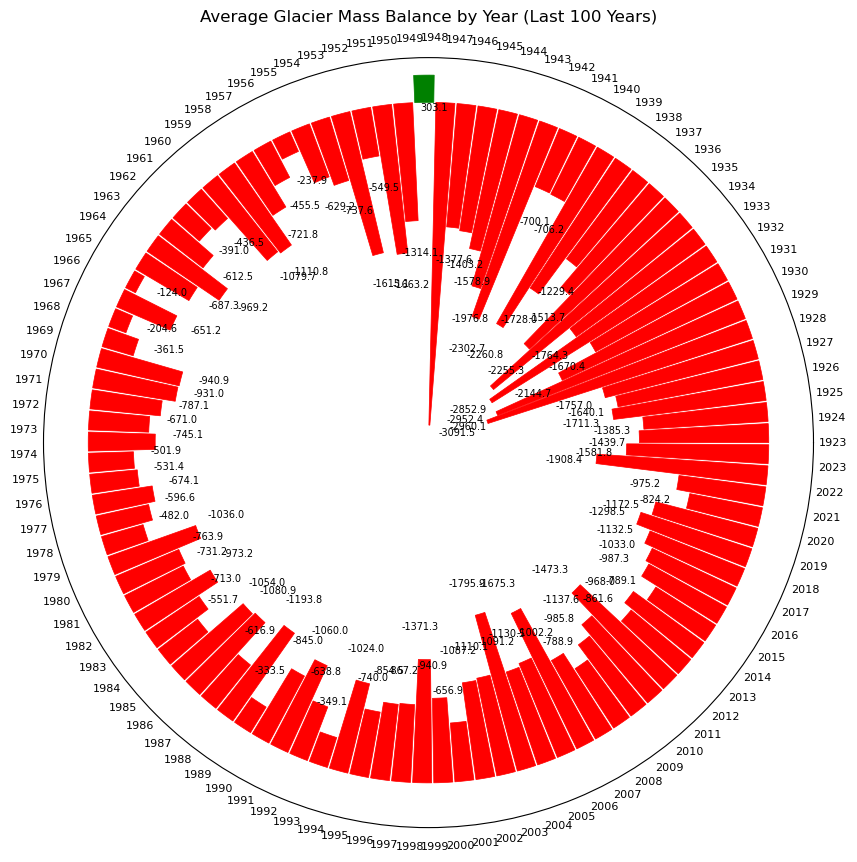

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('mass_balance.csv', sep=',')
df.columns = df.columns.str.strip() # Removes leading/trailing spaces from column names
df = df.dropna(subset=['YEAR', 'ANNUAL_BALANCE']) # Excludes missing data for years and balance
df['YEAR'] = df['YEAR'].astype(int)

# Filter to last 100 years, takes maximum of YEAR sets minimum to it - 100
latest_year = df['YEAR'].max() 
df_last_100 = df[df['YEAR'] >= latest_year - 100]

# Compute average annual balance per year
avg_annual_balance = df_last_100.groupby('YEAR')['ANNUAL_BALANCE'].mean().reset_index() #creates a new dataframe with two columns
#Stores the values in separate Series for ease
years = avg_annual_balance['YEAR']
balances = avg_annual_balance['ANNUAL_BALANCE']
#sets the number of bars and places the bars in a full circle
num_bars = len(years)
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False)

# Use 90% of the full angular width to add spacing between bars
bar_width = (2 * np.pi / num_bars) * 0.9

# Create polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'}) #creates circular plot with a 10x10 inch figure
bars = ax.bar(angles, balances, width=bar_width, bottom=0, align='edge',
                  edgecolor='black', linewidth=0.5) 

# Color and label bars
for angle, balance, bar in zip(angles, balances, bars):
    bar.set_color('red' if balance < 0 else 'green')
        
    # Label each bar slightly beyond its height
    radius = bar.get_height() - 0.1 * max(abs(balances)) 
    ax.text(angle, radius, f"{balance:.1f}", ha='center', va='center', fontsize=7)

# Set year labels at each bar angle
ax.set_xticks(angles)
ax.set_xticklabels(years, fontsize=8, rotation='vertical')

# Clean up radial appearance
ax.set_yticklabels([])
ax.grid(False)
ax.set_title('Average Glacier Mass Balance by Year (Last 100 Years)', va='bottom')

# Save the figure as an image file 
plt.savefig("glacier_radial_timeline.png", dpi=300, bbox_inches='tight') 
    
plt.show()